# Lab04 - Introducción a Redes Neuronales

En la sesión de hoy ya aprendimos qué es una **Red Neuronal** (*Realmente es una ecuación matemática*) y cómo **"aprende"** (*Minizar funciones matemáticas*).  También aprendimos algunos conceptos e hiperparámetros como:
- Perceptrón
- Neuronas
- Capas Ocultas
- Función de Pérdida (Loss)
- Función de Activación
- Descenso de Gradiente
- Retropropagación
- Batch
- Epoca
- Learning Rate (Taza de Aprendizaje)

Es mucha información!  Ahora vamos a aplicarlo todo!

## 4a. Tensorflow Playground

Tensorflow es una librería desarrollada por [Google](https://www.tensorflow.org/?hl=es-419) para aprendizaje profundo. Permite configurar de forma fácil todos los conceptos de redes neuronales como capas ocultas, funciones de activación, y otro hiperarámetros; además, puede usarse tanto en R como en Python!  

Una de las ventajas de Tensorflow, es que su filosofía es siempre acercar la Inteligencia Artificial a las personas de forma amigable y estructurada sin necesidad de conocer todos los cálculos y matemáticas que suceden por debajo (Aunque siempre es mejor conocerlos!).  Como parte de esta metodología, se creó [Tensorflow Playground](https://playground.tensorflow.org/), una plataforma gráfica que permite visualizar la implementación y entrenamiento de una Red Neuronal, y los efectos de configurar cada uno de sus hiperparámetros!  

### Taller:  
Dentro de la plataforma de **TensorFlow Playground** vamos a tratar de construir una red neuronal para cada uno de los siguientes sets de datos.  Trate de construirla de manera que, graficamente divida a los datos por color en la menor cantidad de tiempo (*Epocas*) posible con el *Loss* más bajo posible.  
Algunos de los hiperparámetros con los que puede *jugar* son: 
- Cantidad de capas ocultas
- Cantidad de neuronas en cada capa (Excepto la capa final: 2)
- Taza de Aprendizaje (Learning Rate)
- Función de Activación iniciales y final
- Regularización (Y su respectivo Lambda)
- % de test de entrenamiento y pruebas
- Batch Size
- Epocas (Tú decides cuándo parar!)


[**1. Regresión**  ](https://playground.tensorflow.org/#activation=tanh&batchSize=4&dataset=circle&regDataset=reg-gauss&learningRate=1&regularizationRate=0&noise=0&networkShape=4,4,2&seed=0.48832&showTestData=false&discretize=false&percTrainData=80&x=true&y=true&xTimesY=true&xSquared=true&ySquared=true&cosX=false&sinX=true&cosY=false&sinY=true&collectStats=false&problem=regression&initZero=false&hideText=false)  

[**2. Clasificación**](https://playground.tensorflow.org/#activation=tanh&batchSize=10&dataset=spiral&regDataset=reg-plane&learningRate=1&regularizationRate=0&noise=0&networkShape=4,2&seed=0.88013&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false)  

## 4b. Mi Primera Red Neuronal  

Una de las librerías más cómodas y amigable para definir redes neuronales es [Keras](https://keras.rstudio.com/reference/index.html).  Es amigable porque empaqueta en una sola librería todas las librerías necesarias para realizar las operaciones tan complejas que comprenden una Red Neuronal y simplifica su sintaxis.  

Sin embargo, aunque usarla sea muy fácil, en ocasiones es difícil su instalación por toda la complejidad que lleva por dentro:  

Trate de instalar la librería *keras* y de importarla ejecutando la siguiente celda.  Si no es posible de forma fácil vamos a trabajar usando contenedores en [Docker](https://www.docker.com/)

> Recuerde que el manual y videos tutoriales para utilizar Docker se encuentran en el [repositorio del Diplomado](https://drive.google.com/drive/u/0/folders/1EFve1_7l0X1xpPR6qVR0mikJ0WYbMYgn)

In [1]:
library(keras)
install_keras()


Installation complete.



Recordemos que una Red Neuronal es, al fin y al cabo, una ecuación.  Vamos a entrenar una Red Neuronal/Ecuación sencilla, de la cuál ya conocemos los coeficientes para poder validar su funcionamiento ya que estamos aprendiendo, por ejemplo: **Transformar Grados Centígrados a Grados Farenheit**.  
Obviamente, podemos recordar o [buscar](https://www.google.com/search?sxsrf=ALeKk02bpoMAGFjDz3hSNDjPDDcynzjCTg%3A1602822358031&source=hp&ei=1SCJX-uDO-fO5gLo-InoCA&q=c+to+f&oq=c+to+f&gs_lcp=CgZwc3ktYWIQAzIECCMQJzIECAAQQzIFCAAQywEyBQgAEMsBMgUIABDLATIFCAAQywEyBQgAEMsBMgUIABDLATIFCAAQywEyBQgAEMsBOgcIABCxAxBDOgUIABCxAzoCCAA6CAgAELEDEIMBOgUILhCxAzoHCAAQFBCHAjoCCC5Q9w5Y4BRg0xVoAHAAeACAAY0BiAGFBZIBAzIuNJgBAKABAaoBB2d3cy13aXo&sclient=psy-ab&ved=0ahUKEwirwqPKorjsAhVnp1kKHWh8Ao0Q4dUDCAc&uact=5) la ecuación y crear una función tradicional que haga el cálculo:  
$$ F = 2/9*C + 32 $$

... pero esto no sería Machine Learning!  Además, no siempre vamos a conocer la ecuación de antemano.  

Por el contrario, vamos a crear un modelo basado en *algunos* valores de grados Celsius, para los que conocemos sus correspondientes valores Farenheit y vamos a dejar que el modelo encuentre la relación entre ellos.

In [2]:
c = c(-40, -18, 0, 10, 20, 30, 40,  50, 60, 70, 80, 90)
f = c(-40,  0, 32, 50, 68, 86, 104, 122, 140, 158, 176, 194)

Recordemos los tres pasos para implementar una Red Neuronal que vimos en clase:  

**1. Definir el Modelo**  
El modelo se define como un listado de capas a las cuales debemos configurar para cada una, el número de neuronas y la función de activación.  Por ahora, para empezar, vamos a definir solo una capa, Densa, con una sola Neurona:

In [3]:
model <- keras_model_sequential() 

model %>% 
  layer_dense(units = 1, input_shape = c(1)) 

summary(model)

Model: "sequential"
________________________________________________________________________________
Layer (type)                        Output Shape                    Param #     
dense (Dense)                       (None, 1)                       2           
Total params: 2
Trainable params: 2
Non-trainable params: 0
________________________________________________________________________________


El resumen del modelo nos muestra que, aunque no ha sido entrenada, la red tiene una sola capa (*dense_x*), con una sola salida, y que está preparado para entrenar dos parámetros: La neurona de la primera capa y el bias.  

**2. Compilar el Modelo**  
Ahora debemos decirle al Modelo, cómo medir si se está equivocando (*Función de pérdida*), cómo evaluarse a sí mismo (*Métricas*) y cómo ajustar sus valores (*Optimizador*) para ir mejorando en cada época:

In [4]:
model %>% compile(
  loss = "mean_squared_error",
  optimizer = optimizer_adam(lr = 0.1),
  metrics = list("mean_absolute_error")
)

**3. Entrenar el Modelo**  
Listo! Ya le indicamos a la red su estructura, y sus métodos de aprendizaje, ahora solo falta indicarle con qué datos se va a entrenar y por cuanto tiempo lo va a hacer (épocas):

In [5]:
history <- model %>% fit(
  c, f, 
  epochs = 500,
  steps_per_epoch=12
)

Estas 500 épocas se ejecutaron muy rápido!  Cuando estemos trabajando con un dataset real/más grande (Con más atributos y muchísimos más registros) es posible que tome mucho más tiempo, por esto es importante tener en cuenta la cantidad de épocas y pasos en cada época.  

En este ejemplo, vemos como, época a época, el modelo va evolucionando: Disminuye el valor de pérdida (*loss*) y aumentan/disminuyen las métricas elegidas (En este caso, *Error Medio Absoluto*, disminuye!).  
Es mucho mejor ver esta evolución del modelo gráficamente para tomar decisiones.  Si ejecutamos la sentencia anterior en una consola de R-Studio, nos va a mostrar la fráfica de entrenamiento en tiempo real, pero si no, podemos generar la gráfica final de la siguiente manera:

`geom_smooth()` using formula 'y ~ x'



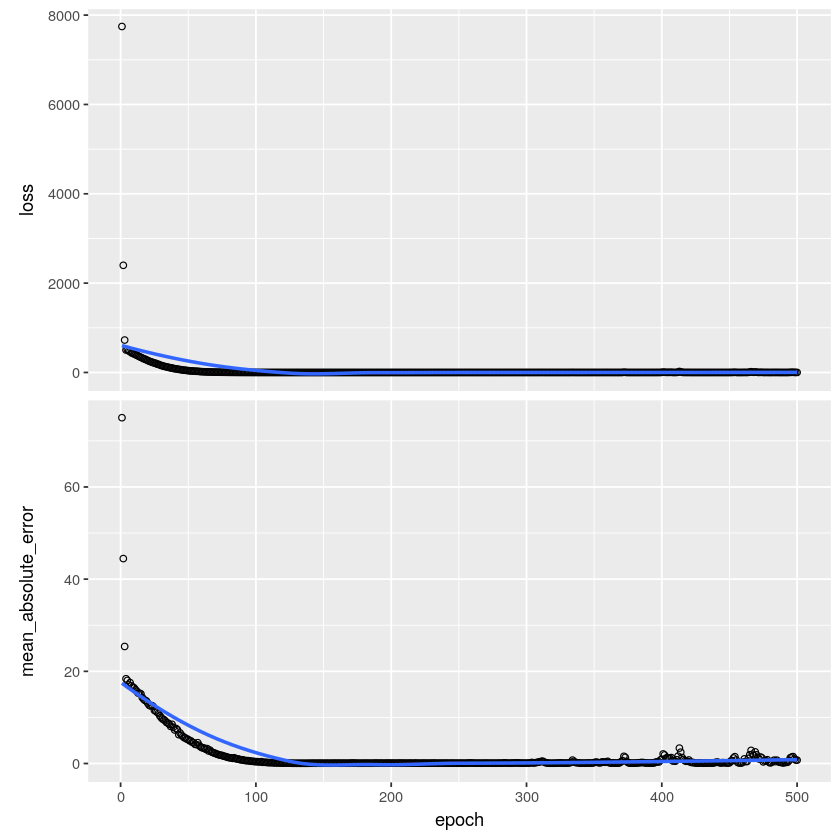

In [6]:
plot(history)

Aquí vemos de forma gráfica cómo, en su primer intento (epoca), el modelo se equivocó muchísimo "adivinando" los coeficientes de la ecuación, es decir el valor del *loss* dio muy alto al elegir los coeficientes aleatoriamente.  Sin embargo, en las siguientes épocas, estos valores se fueron optimizando, disminuyendo el *loss* a casi 0.  

**Ejercicio:**  
Compile y entrene nuevamente el modelo (*compile()* y *fit()*) sin cambiar ningún parámetro.  Genere nuevamente la gráfica de pérdida.  Qué nota?  

Es muy posible que la gráfica sea diferente cada vez (Es decir: Las Redes Neuronales son **No Determinísticas**).  Esto se debe a:  
- Los valores iniciales se eligen aleatoriamente y son distintos cada vez que se compila/entrena el modelo.  
- Lo mismo pasa con cada época, para modificar los coeficientes de una época a otra usando la función de optimización se toman valores aleatorios muy pequeños (Taza de Aprendizaje, LR).  
- En todo caso, aunque se trata de varias decisiones aleatorias, las "reglas del juego": optimizador, métricas y funcion depérdida, ayudan al modelo a encaminarse a una buena solución  

La función evaluate() nos va a entregar las métricas correspondientes a la última epoca, la que definió el modelo finalmente:

In [7]:
model %>% evaluate(c, f,verbose = 0)

loss mean_absolute_error 
         0.07212376          0.26535001

Vamos a probar el Modelo!  Intentemos pasar un valor con el que no haya sido entrenado (En este caso, como se trata de una ecuación científica muy común, podemos saber el valor real que debería haber retornado)

In [8]:
model %>% predict(c(38)) # 100C
model %>% predict(c(100)) # 212C
model %>% predict(c(200)) # 392C

100.6741


212.3295


392.4189


Como una prueba adicional, vamos a hacer algo que solo podemos hacer en este caso y es validar los pesos asignados por el modelo. Esto porque asignamos una sola capa de una sola neurona (Entonces es sencillo) y porque conocemos la ecuación que estamos buscando (Esto no ocurre nunca!):  
$$ F = 2/9*C + 32 = 1.8*C + 32$$

In [9]:
get_weights(model)

1.800894


**Taller:**  

Qué pasa si añadimos más capas y neuronas a la Red? O si cambiamos el método de aprendizaje?

- En la definición del modelo, puede agregar cualquiera o varias de las siguientes capas a la función, en cualquier orden y modificar los valores *x* de sus hiperparámetros:

>model <- keras_model_sequential()   
    **model %>% layer_dense(x, input_shape=c(1))** # *No cambiar input_shape (#entradas este caso = 1)*  
    **model %>% layer_dense(x)** # *A partir de la 2 capa podemos "jugar" con la cantidad de neuronas*  
    **model %>% layer_dropout(x)** # *También podemos modificar otrss parámetros de cada una*  
    model %>% layer_dense(1) # *No cambiar (#salidas este caso = 1)* 
    
- En las capas principales puede cambiar también la función de activación por los valores: *activation = "relu", "softmax", "sigmoid", "tanh"*
- En la compilación del modelo, intente con otros optimizadores, por ejemplo: *optimizer_sgd, optimizer_adadelta, optimizer_adam, optimizer_rmsprop*
- En el entrenamiento del modelo, pruebe modificando los valores de *epochs* y *steps_per_epoch*  

> Tenga en cuenta que si va a trabajar un problema de **Clasificación**, también puede "jugar" con *loss = "categorical_crossentropy"* y *metrics = list("accuracy", "recall")*...

Analice cómo cambia la estructura de la red (*summary()*), y como evoluciona en entrenamiento de acuerdo a su nueva configuración (Mejora? Empeora? Aprende más rápido?)  

También note cómo, si agregó más capas o neuronas a la red, la última función de este ejercicio (*get_weights()*) ahora arroja muchos más coeficientes de variables que realmente no podemos entender (**No explicativo**), añadiento muchísima más complejidad al modelo aunque también arroja un resulado **correcto**.